In [1]:
import pandas as pd
import cv2
import albumentations as A
import matplotlib.pyplot as plt
# from model import resnet50
from dataloader import dataset_IMG
import torch
import torchvision.models as models
from torch.utils.data import DataLoader
from tqdm import tqdm
import torchvision


ResNet50(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride

In [2]:
import pandas as pd
import cv2
import albumentations as A
import matplotlib.pyplot as plt
# from model import resnet50
from dataloader import dataset_IMG
import torch
# import torchvision.models as models
from torch.utils.data import DataLoader
from tqdm import tqdm
from  torchvision.models import resnet34,ResNet34_Weights
import torchvision
import multiprocessing

batch_size=32 
train_dataset = dataset_IMG(train_model="train",csv_path="Train.csv")
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

test_dataset = dataset_IMG(train_model="test",csv_path="Test.csv")
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu") #

resnet = resnet34(weights=ResNet34_Weights.IMAGENET1K_V1)#
resnet.fc = torch.nn.Linear(resnet.fc.in_features, 43)
model = resnet.to(device)

# 定義損失函數與優化器
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001,weight_decay=0.0001)

# if __name__ == '__main__':
#     multiprocessing.freeze_support()
#     multiprocessing.set_start_method('spawn')

num_epochs = 15
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in tqdm(trainloader,total=len(trainloader)):
        optimizer.zero_grad()

        inputs = inputs.float().to(device)#.type(torch.cuda.FloatTensor)
        labels = labels.to(device)
        
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        
        
        running_loss += loss.detach().cpu().item()
        
    # print(f"Epoch {epoch+1}, Loss: {running_loss}")

    # 計算訓練集與測試集的準確率
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in trainloader:
            inputs = inputs.to(device).type(torch.cuda.FloatTensor)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    train_accuracy = 100 * correct / total
    
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs = inputs.to(device).type(torch.cuda.FloatTensor)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    test_accuracy = 100 * correct / total
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(trainloader):.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")


100%|██████████| 1226/1226 [05:08<00:00,  3.98it/s]


Epoch [1/15], Loss: 0.7509, Train Accuracy: 90.82%, Test Accuracy: 88.67%


100%|██████████| 1226/1226 [05:04<00:00,  4.03it/s]


Epoch [2/15], Loss: 0.2457, Train Accuracy: 93.16%, Test Accuracy: 91.04%


100%|██████████| 1226/1226 [05:05<00:00,  4.02it/s]


Epoch [3/15], Loss: 0.1941, Train Accuracy: 94.28%, Test Accuracy: 92.23%


100%|██████████| 1226/1226 [05:05<00:00,  4.01it/s]


Epoch [4/15], Loss: 0.1610, Train Accuracy: 94.10%, Test Accuracy: 92.79%


100%|██████████| 1226/1226 [05:08<00:00,  3.98it/s]


Epoch [5/15], Loss: 0.1375, Train Accuracy: 96.50%, Test Accuracy: 94.12%


100%|██████████| 1226/1226 [04:41<00:00,  4.36it/s]


Epoch [6/15], Loss: 0.1200, Train Accuracy: 96.27%, Test Accuracy: 92.76%


100%|██████████| 1226/1226 [04:45<00:00,  4.30it/s]


Epoch [7/15], Loss: 0.1039, Train Accuracy: 97.08%, Test Accuracy: 94.64%


100%|██████████| 1226/1226 [04:44<00:00,  4.31it/s]


Epoch [8/15], Loss: 0.0978, Train Accuracy: 96.97%, Test Accuracy: 94.24%


100%|██████████| 1226/1226 [04:45<00:00,  4.29it/s]


Epoch [9/15], Loss: 0.0912, Train Accuracy: 97.84%, Test Accuracy: 95.23%


100%|██████████| 1226/1226 [04:56<00:00,  4.13it/s]


Epoch [10/15], Loss: 0.0819, Train Accuracy: 97.29%, Test Accuracy: 94.62%


100%|██████████| 1226/1226 [05:07<00:00,  3.98it/s]


Epoch [11/15], Loss: 0.0773, Train Accuracy: 97.84%, Test Accuracy: 95.39%


100%|██████████| 1226/1226 [05:08<00:00,  3.98it/s]


Epoch [12/15], Loss: 0.0770, Train Accuracy: 97.60%, Test Accuracy: 95.34%


100%|██████████| 1226/1226 [05:07<00:00,  3.99it/s]


Epoch [13/15], Loss: 0.0783, Train Accuracy: 97.76%, Test Accuracy: 94.41%


100%|██████████| 1226/1226 [05:09<00:00,  3.96it/s]


Epoch [14/15], Loss: 0.0657, Train Accuracy: 98.16%, Test Accuracy: 94.58%


100%|██████████| 1226/1226 [05:11<00:00,  3.94it/s]


Epoch [15/15], Loss: 0.0681, Train Accuracy: 97.80%, Test Accuracy: 95.61%


In [3]:
predicted_ = []
label_ = []
with torch.no_grad():
    for inputs, labels in testloader:
        inputs = inputs.to(device).type(torch.cuda.FloatTensor)
        labels = labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        predicted_.append(predicted)
        label_.append(labels)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

In [10]:
predicted_[0]

[16,
 1,
 38,
 33,
 11,
 38,
 18,
 12,
 25,
 35,
 12,
 7,
 23,
 7,
 4,
 9,
 2,
 20,
 27,
 38,
 4,
 33,
 9,
 3,
 1,
 11,
 13,
 10,
 9,
 11,
 5,
 17]

In [25]:
pred_list=[]
for i in predicted_:
    pred_list.extend(j for j in i.cpu().detach().numpy().tolist())


In [24]:
label_list=[]
for i in label_:
    label_list.extend(j for j in i.cpu().detach().numpy().tolist())

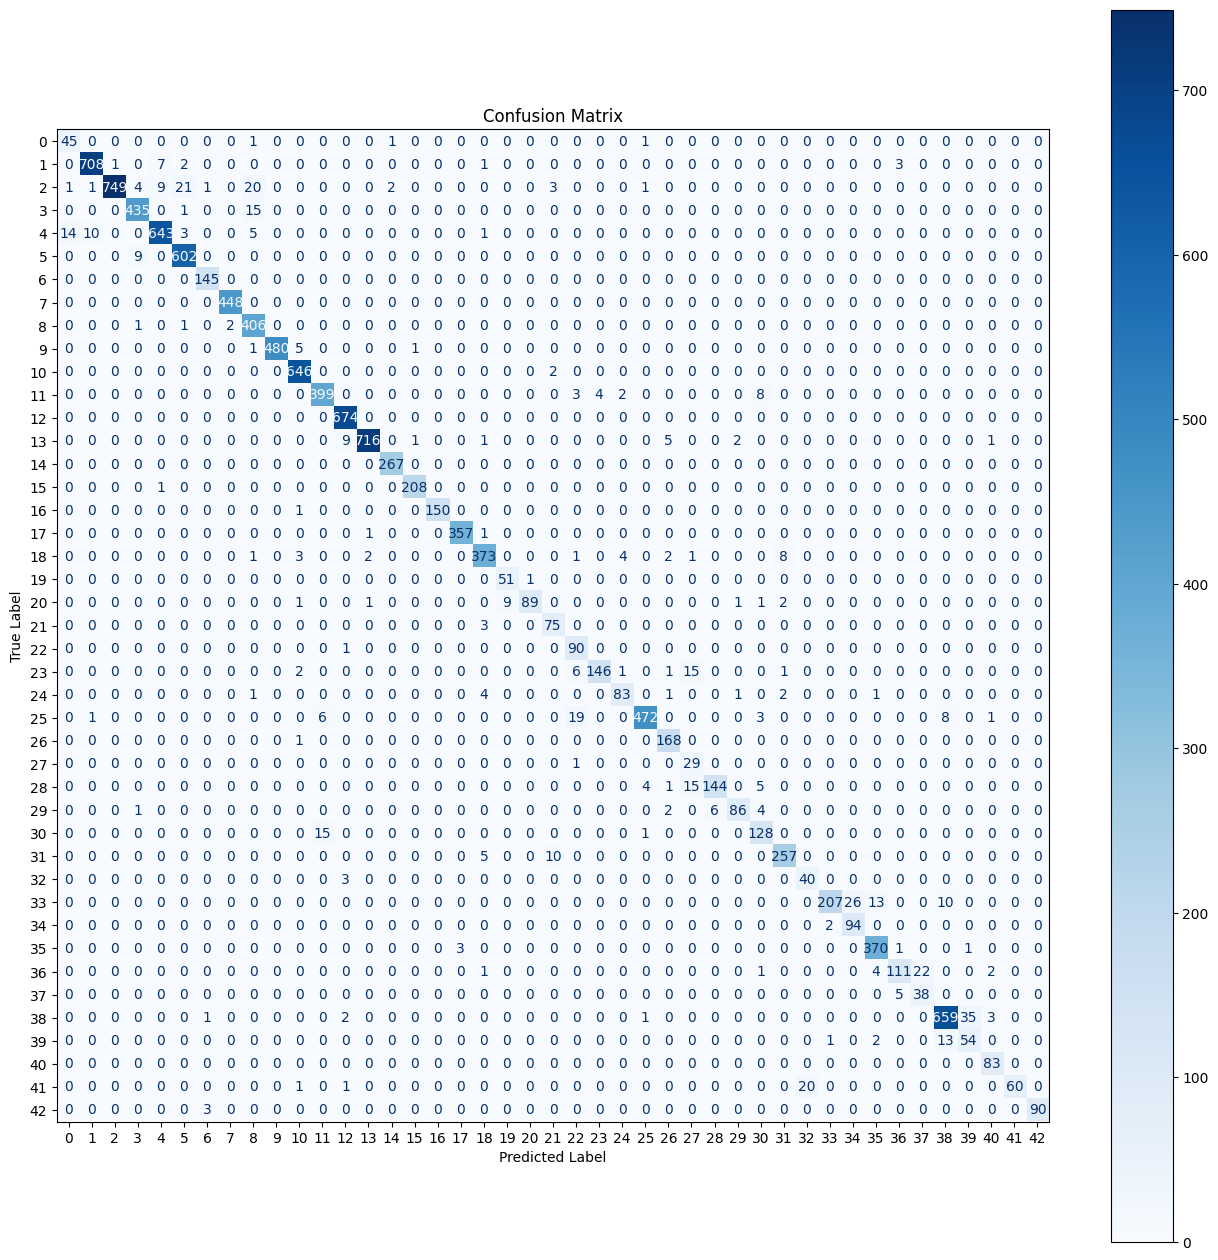

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# 假设您有一个分类器 clf 和测试数据 X_test, y_test

# 获取预测结果
# y_pred = clf.predict(X_test)

# 计算混淆矩阵
cm = confusion_matrix(pred_list, label_list)

# 创建一个绘图对象
fig, ax = plt.subplots(figsize=(16, 16))

# 绘制混淆矩阵图
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, ax=ax)

# 添加标题和轴标签
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")

# 显示图像
plt.show()

In [26]:
len(label_list)

12630